In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
import colorsys
import skimage.io
from os import listdir
from os.path import isfile, join
import os
import os.path

In [190]:
extractedPath = '/Volumes/My Passport/aorta/results/KI67/extractedSignal/P10/aorta4/ki67Signal_P10_aorta4_NEW2.csv'
df = pd.read_csv(extractedPath)
dfThresholded = pd.DataFrame()

In [ ]:
brighteningValue = 700
imageNumber = 15

segFolder = '/Volumes/My Passport/aorta/segmentations/ki67_tiled/P14/aorta4'
seg1 = 'ki67Image_P14_aorta4_nuclei_'  
seg2 = '_seg.npy'
ki671 = '/Volumes/My Passport/aorta/preprocessedImage/ki67/tiled/ki67/P14/aorta4/ki67Image_P14_aorta4_ki67_' 
ki672 = '.tif'

segFilePath = segFolder + '/' + seg1 + str(imageNumber)  + seg2
ki67ImagePath = ki671 + str(imageNumber) + ki672

nucMasks = np.load(segFilePath, allow_pickle=True).item()['masks']

ki67Image = skimage.io.imread(ki67ImagePath)
dfImage = df.loc[df.imageNumber == imageNumber]


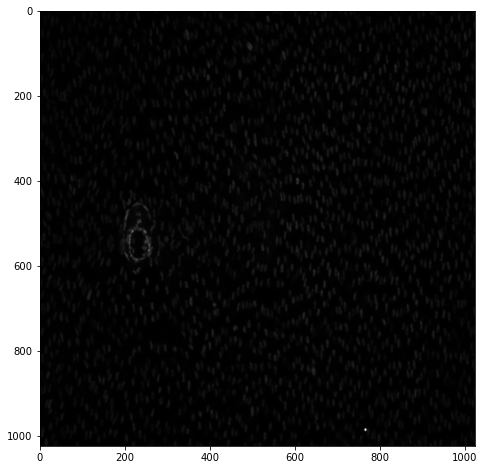

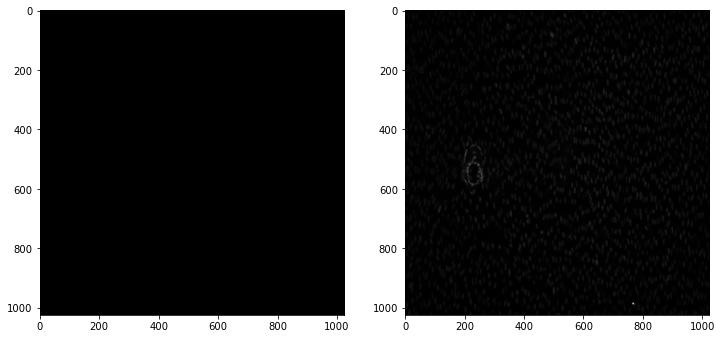

In [ ]:
thresholdIntensity = 0.1
thresholdfraction = 3

dfFilter = dfImage.loc[(dfImage.fractionNorm >= thresholdfraction) & (dfImage.medianNorm >= thresholdIntensity)]
dfUnfiltered = dfImage.loc[~((dfImage.fractionNorm >= thresholdfraction) & (dfImage.medianNorm >= thresholdIntensity))]


backgroundMaskRedInt = np.where(nucMasks > 0, np.median(ki67Image), ki67Image)
ki67Bright = np.where((ki67Image.max() - ki67Image) < brighteningValue,ki67Image.max(),ki67Image+brighteningValue)

activeImage = np.zeros_like(ki67Image)
inactiveImage = np.zeros_like(ki67Image)
activeCoord = np.isin(nucMasks, dfFilter['label'].values)
inactiveCoord = ~np.isin(nucMasks, dfFilter['label'].values)
activeImage[activeCoord] = ki67Bright[activeCoord]
inactiveImage[inactiveCoord] = ki67Bright[inactiveCoord]

plt.figure(figsize=(16, 8))

plt.imshow(ki67Bright , cmap="gray")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(activeImage, cmap='gray')
axes[1].imshow(inactiveImage, cmap='gray')

plt.show()

(array([5867.,  467.,  480.,  499.,  517.,  485.,  489.,  559.,  583.,
         517.,  553.,  543.,  552.,  554.,  591.,  601.,  576.,  599.,
         537.,  533.,  537.,  552.,  520.,  474.,  466.,  457.,  406.,
         408.,  361.,  354.,  346.,  299.,  280.,  259.,  226.,  250.,
         200.,  207.,  200.,  156.]),
 array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  , 0.0225, 0.025 , 0.0275, 0.03  , 0.0325, 0.035 , 0.0375,
        0.04  , 0.0425, 0.045 , 0.0475, 0.05  , 0.0525, 0.055 , 0.0575,
        0.06  , 0.0625, 0.065 , 0.0675, 0.07  , 0.0725, 0.075 , 0.0775,
        0.08  , 0.0825, 0.085 , 0.0875, 0.09  , 0.0925, 0.095 , 0.0975,
        0.1   ]),
 <BarContainer object of 40 artists>)

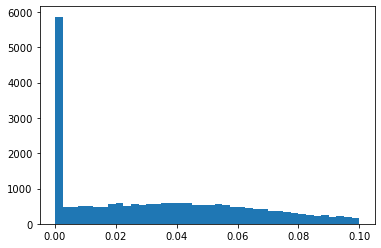

In [102]:
plt.hist(df.medianNorm, bins = 40, range = (0,0.1))

In [ ]:
thresholdIntensity = 0.02
thresholdfraction = 3
df['thresholdfraction'] = thresholdfraction
df['thresholdIntensity'] = thresholdIntensity
df['positive'] = ((df['fractionNorm'] > thresholdfraction) & (df['medianNorm'] > thresholdIntensity)).astype(int)
np.mean(df['positive'])

dfSave = df

In [192]:
dfSave.to_csv('/Volumes/My Passport/aorta/results/KI67/thresholdedValues/P10/aorta04/ki67Signal_P10_aorta01_NEW.csv', index=False)

In [ ]:
filesNuclei = [f for f in listdir(segFolder) if isfile(join(segFolder, f)) if "_seg.npy" in f if "._" not in f]
imageNumbers = []
for file in filesNuclei:
    imageNumbers.append(int(file.split(seg2)[0].split(seg1)[-1]))

df['thresholdfraction'] = thresholdfraction
df['thresholdIntensity'] = thresholdIntensity
df['positive'] = ((df['fractionNorm'] > thresholdfraction) & (df['medianNorm'] > thresholdIntensity)).astype(int)
dfSave = df[df['imageNumber'].isin(imageNumbers)]


In [ ]:
dfSave.to_csv('/Volumes/My Passport/aorta/results/KI67/thresholdedValues/P21/aorta04/ki67Thresholded_P21_a4.csv', index=False)